# Autoencoder implementation with Tensorflow for MNIST dataset

This is a copy of the autoencoder_tf.py from the GAN and VAE course but with additional comments 

Goal: for personal learning of VAE on the reconstruction of MNIST dataset digit images  

https://deeplearningcourses.com/c/deep-learning-gans-and-variational-autoencoders
https://www.udemy.com/deep-learning-gans-and-variational-autoencoders

In [6]:
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

import util
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Notes about the mnist dataset:

- It's meant to be a dataset of 70000 images of 28 * 28 pixels (784 pixels).


- In the edited current dataset, it has 48000 samples for training data and 28000 samples for test data.
- Each sample is a row in the csv file.
- Each column is a 'feature' which is actually just the pixel, with 784 pixels.
- Each value is a RGB code from 0 to 255. 


- In the util.py, the get_mnist function will divide every single pixel value by 255 to get a value from 0 to 1, thus grayscaling the whole dataset.




In [15]:
# construct the Autoencoder class 
# 1 hidden layer neural net with ReLU activation function and sigmoid output 
# --> MNIST dataset images each values only 0 or 1

class Autoencoder:
    def __init__(self, D, M): 
        # the input and output layer (encoder and decoder) will have same dimension of D x 1 size 
        
        # training data batch (input layer)
        self.X = tf.placeholder(tf.float32, shape = (None, D)) # input 2D matrix of n x D (n is a variable, thus None)
        
        # input --> hidden 
        self.W = tf.Variable(tf.random_normal(shape = (D, M)) * np.sqrt(2.0/M)) # set the weights 
        self.b = tf.Variable(np.zeros(M).astype(np.float32))
        
        # hidden --> output 
        self.V = tf.Variable(tf.random_normal(shape = (M, D)) * np.sqrt(2.0/D)) 
        self.c = tf.Variable(np.zeros(D).astype(np.float32))
        
        # construct the reconstruction 
        self.Z = tf.nn.relu(tf.matmul(self.X, self.W) + self.b) # input --> hidden
        logits = tf.matmul(self.Z, self.V) + self.c # hidden --> output
        self.X_hat = tf.nn.sigmoid(logits) # final output layer 
        
        # compute the cost 
        self.cost = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(
                                    labels = self.X,
                                    logits = logits))
        
        # make the trainer 
        self.train_op = tf.train.RMSPropOptimizer(learning_rate = 0.001).minimize(self.cost) # optimize by minimizing cost
        
        # set up the session and variables for later 
        self.init_op = tf.global_variables_initializer()
        self.sess = tf.InteractiveSession()
        self.sess.run(self.init_op)
    
    # fit function for the autoencoder class 
    def fit(self, X, epochs = 30, batch_size = 64):
        costs = []
        n_batches = len(X) // batch_size 
        print("Number of batches: ", n_batches)
        
        # loop over all epochs 
        for i in range(epochs):
            print("")
            print("Currently at Epoch ", i)
            
            # loop over all batches 
            for j in range(n_batches):
                batch = X[j * batch_size : (j+1)*batch_size ] # slice batch from X training set
                _, cost = self.sess.run((self.train_op, self.cost), feed_dict = {self.X : batch})
                cost /= batch_size 
                costs.append(cost)
                
                if j % 100 == 0:
                    print("iter: %d, Cost: %.3f" % (j, cost))
        # plot cost over time
        plt.plot(costs)
        plt.show()
    
    # predict function for reconstruction 
    def predict(self, X):
        return self.sess.run(self.X_hat, feed_dict = {self.X: X})    

Reading in and transforming data...


C:\Users\pengf\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Number of batches:  656

Currently at Epoch  0
iter: 0, Cost: 560.259
iter: 100, Cost: 112.964
iter: 200, Cost: 91.099
iter: 300, Cost: 77.048
iter: 400, Cost: 72.601
iter: 500, Cost: 70.729
iter: 600, Cost: 66.047

Currently at Epoch  1
iter: 0, Cost: 60.448
iter: 100, Cost: 62.744
iter: 200, Cost: 63.421
iter: 300, Cost: 60.861
iter: 400, Cost: 61.797
iter: 500, Cost: 61.202
iter: 600, Cost: 61.314

Currently at Epoch  2
iter: 0, Cost: 54.135
iter: 100, Cost: 58.059
iter: 200, Cost: 59.069
iter: 300, Cost: 56.669
iter: 400, Cost: 58.445
iter: 500, Cost: 56.744
iter: 600, Cost: 58.796

Currently at Epoch  3
iter: 0, Cost: 52.785
iter: 100, Cost: 55.488
iter: 200, Cost: 55.690
iter: 300, Cost: 54.534
iter: 400, Cost: 57.062
iter: 500, Cost: 55.100
iter: 600, Cost: 56.604

Currently at Epoch  4
iter: 0, Cost: 51.484
iter: 100, Cost: 54.435
iter: 200, Cost: 54.862
iter: 300, Cost: 53.611
iter: 400, Cost: 56.672
iter: 500, Cost: 55.425
iter: 600, Cost: 54.106

Currently at Epoch  5
iter: 

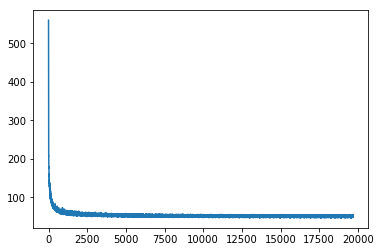

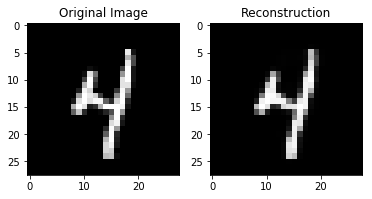

Do you want to generate another?y


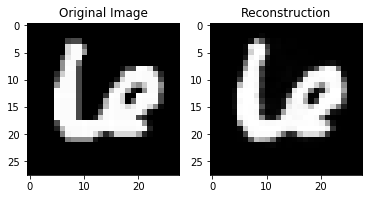

Do you want to generate another?y


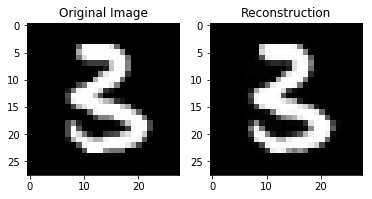

Do you want to generate another?y


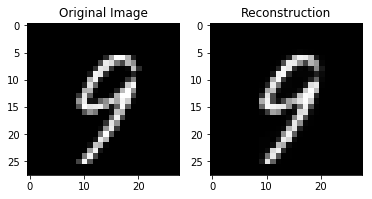

Do you want to generate another?


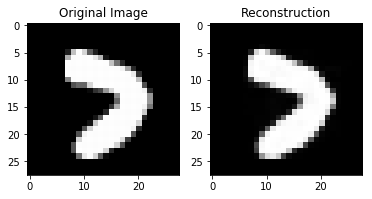

Do you want to generate another?


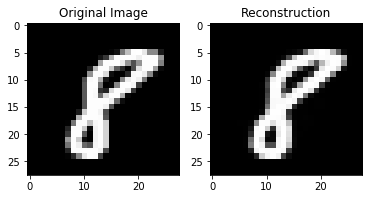

Do you want to generate another?


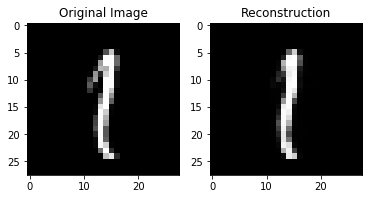

Do you want to generate another?


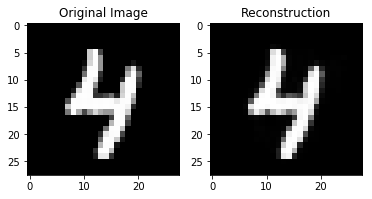

Do you want to generate another?


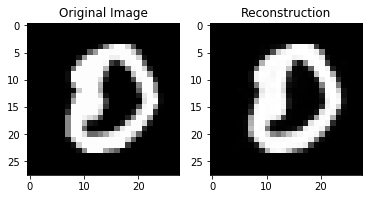

Do you want to generate another?


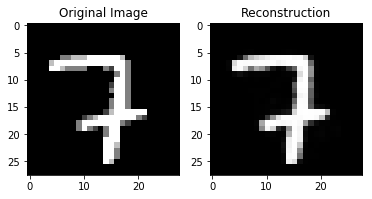

Do you want to generate another?


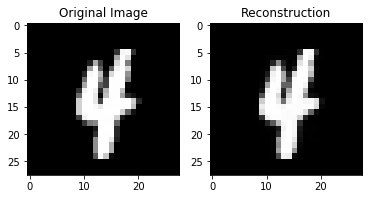

Do you want to generate another?


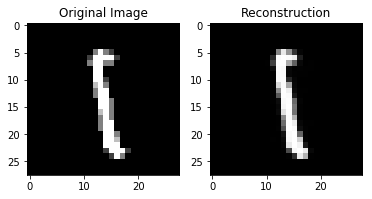

Do you want to generate another?


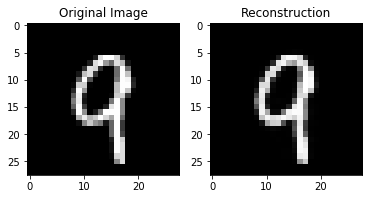

Do you want to generate another?


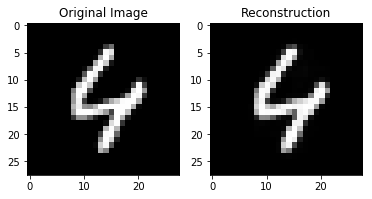

Do you want to generate another?n


In [16]:
# Main 

X, Y = util.get_mnist() # get data from mnist csv

model = Autoencoder(784, 300) # initialize model with 784 input nodes --> 784 features (28 * 28 pixels of value 0..1)

# fit the model with the X training set 
model.fit(X)

# now plot the reconstruction 
done = False 
while not done:
    i = np.random.choice(len(X)) # choose a random training sample 
    x = X[i]
    image = model.predict([x]).reshape(28, 28) # reshape the 784 * 1 --> 28 * 28 again to be a picture 
    
    plt.subplot(1,2,1) 
    plt.imshow(x.reshape(28, 28), cmap = 'gray') # grayscale image of original x 
    plt.title("Original Image")
    
    plt.subplot(1,2,2)
    plt.imshow(image, cmap = 'gray')
    plt.title("Reconstruction")
    plt.show()
    
    ans = input("Do you want to generate another?")
    if ans and ans[0] in ('n' or 'N'):
        done = True

In [14]:
# total cost values in the list = 656 * 30